In [12]:
#part A1
import seaborn as sb
import matplotlib.pyplot as plt
import random
import pandas as pd
import sklearn

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, recall_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

In [14]:
# creating dataset with having labels either 1 or 0
actual_data= [random.randint(0,1) for i in range(20)]
predicted_data= actual_data[0:8] + [1,0,0,1] + actual_data[12:]
print("Actual data :",  actual_data)
print("Predicted data :",  predicted_data)


Actual data : [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
Predicted data : [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]


In [15]:
# we will calculate different values on this data
tn, fp, fn, tp= confusion_matrix(actual_data, predicted_data).ravel()
print(" TN ", tn)
print(" FP ", fp)
print(" FN ", fn)
print(" TP ", tp)
#When we use the ravel method on the confusion matrix, it flattens the matrix by concatenating all 
#the rows of the matrix into a single 1-D array. This makes it easier to compute metrics 
#that require the values of TP, TN, FP, and FN.

 TN  6
 FP  1
 FN  2
 TP  11


In [16]:
# calculating metrics given in the question
def accuracy(tn, fp, fn, tp):
    return (tp + tn)/ (tp + tn+ fp+ fn)
def precision(tp, fp):
    return tp/ (tp+fp)
def recall(tp, fn):
    return tp/ (tp + fn)
def f1(tp, fp, fn):
    p= precision(tp, fp)
    r=recall(tp, fn)
    return 2*(p*r)/(p + r)
def mcc(tn, fp, fn, tp):
     return ((tp * tn) - (fp * fn))/(((tp + fp) * (tp + fn) * (fp + tn) * (tn + fn)) ** (1/2))

In [17]:
# comparing with sklearn values
my_accuracy = accuracy(tn, fp, fn, tp)
sk_accuracy = accuracy_score(actual_data,predicted_data)
print(f"My Accuracy       : {my_accuracy : 0.4}")
print(f"sklearn Accuracy  : {sk_accuracy : 0.4}")

my_precision = precision(tp, fp)
sk_precision = precision_score(actual_data,predicted_data)
print(f"My Precision      : {my_precision : 0.4}")
print(f"sklearn Precision : {sk_precision : 0.4}")

my_recall = recall(tp, fn)
sk_recall = recall_score(actual_data,predicted_data)
print(f"My Recall         : {my_recall : 0.4}")
print(f"sklearn Recall    : {sk_recall : 0.4}")

my_f1_score = f1(tp, fp, fn)
sk_f1_score = f1_score(actual_data,predicted_data)
print(f"My f1 score       : {my_f1_score : 0.4}")
print(f"sklearn f1 score  : {sk_f1_score : 0.4}")

my_mcc = mcc(tn, fp, fn, tp)
sk_mcc = matthews_corrcoef(actual_data,predicted_data)
print(f"My MCC            : {my_mcc : 0.4}")
print(f"sklearn MCC       : {sk_mcc : 0.4}")

My Accuracy       :  0.85
sklearn Accuracy  :  0.85
My Precision      :  0.9167
sklearn Precision :  0.9167
My Recall         :  0.8462
sklearn Recall    :  0.8462
My f1 score       :  0.88
sklearn f1 score  :  0.88
My MCC            :  0.6847
sklearn MCC       :  0.6847


sklearn's Confusion Matrix Plot

              Predicted Value
True Value      TP     FN
                FP     TN

              Predicted Value
True Value      11     2 
                1      6 


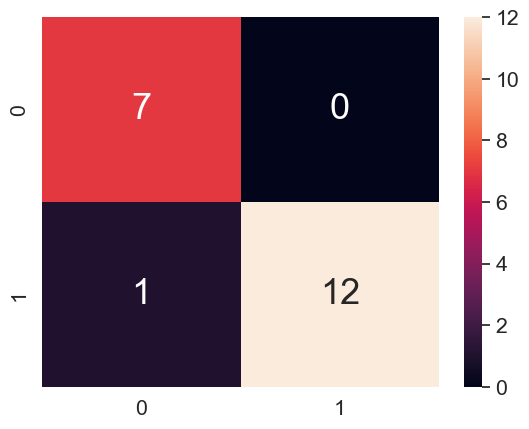

In [18]:
# confusion matrix now
sk_array= [[tp, fn], [fp,tn]]
df= pd.DataFrame(array, range(2), range(2))
sb.set(font_scale= 1.4)
sb.heatmap(df, annot= True, annot_kws ={"size" : 26})
print("sklearn's Confusion Matrix Plot")
print()
print("              Predicted Value")
print("True Value      TP     FN")
print("                FP     TN")
print()
print("              Predicted Value")
print(f"True Value      {tp : ^2}     {fn : ^2}")
print(f"                {fp : ^2}     {tn : ^2}")
plt.show()

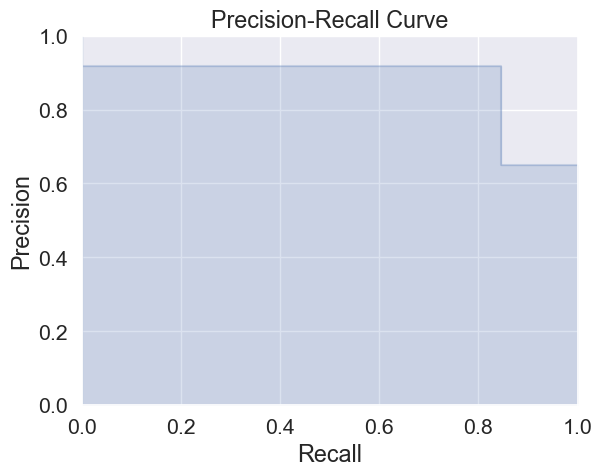

In [19]:
precision_curve, recall_curve, _ = precision_recall_curve(actual_data, predicted_data)
plt.step(recall_curve, precision_curve, color = "b", alpha = 0.2, where = "post")
plt.fill_between(recall_curve, precision_curve, color = "b", alpha = 0.2, step = "post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("Precision-Recall Curve")
plt.show()

sklearn ROC-AUC Score :  0.8516483516483517


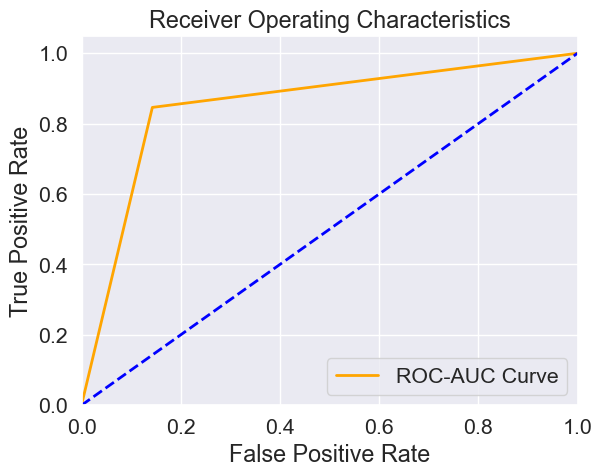

In [20]:
print("sklearn ROC-AUC Score : ", roc_auc_score(actual_data,predicted_data))
fpr, tpr, _ = roc_curve(actual_data,predicted_data)
plt.figure()
plt.plot(fpr,tpr, color = "orange", lw = 2, label = "ROC-AUC Curve")
plt.plot([0,1], [0,1], color = "blue", lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc = "lower right")
plt.show()